<a href="https://colab.research.google.com/github/insyspo/ordovician/blob/main/Ordovician_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
!pip install igraph
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:00


In [ ]:
from igraph import Graph
import igraph as ig
import pandas as pd
import leidenalg as la
import numpy as np
import pandas_gbq
import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


# Collect works

## Original set of works - Ordovician keywords

In [ ]:
%%bigquery --project insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.works_ordovician;
CREATE TABLE insyspo.userdb_carolina_zabini.works_ordovician AS (
  SELECT DISTINCT id
  FROM (
    SELECT id
    FROM insyspo.publicdb_openalex_2024_02_rm.works
    WHERE LOWER(display_name) LIKE '%ordovician%'
      OR LOWER(display_name) LIKE '%silurian%'
      OR LOWER(display_name) LIKE '%early paleozoic%'
      OR LOWER(display_name) LIKE '%early palaeozoic%'
      OR LOWER(display_name) LIKE '%post cambrian%'
      OR LOWER(display_name) LIKE '%post-cambrian%'
      OR LOWER(display_name) LIKE '%postcambrian%'
      OR LOWER(display_name) LIKE '%pre silurian%'
      OR LOWER(display_name) LIKE '%pre-silurian%'
      OR LOWER(display_name) LIKE '%presilurian%'
      OR LOWER(display_name) LIKE '%basal palaeo%'
      OR LOWER(display_name) LIKE '%basal paleozoic%'
      OR LOWER(display_name) LIKE '%early phanerozoic%'
      OR LOWER(display_name) LIKE '%hirnantian%'
      OR LOWER(display_name) LIKE '%katian%'
      OR LOWER(display_name) LIKE '%sandbian%'
      OR LOWER(display_name) LIKE '%darriwillian%'
      OR LOWER(display_name) LIKE '%dapingian%'
      OR LOWER(display_name) LIKE '%floian%'
      OR LOWER(display_name) LIKE '%tremadocian%'
    UNION ALL
    SELECT id
    FROM insyspo.projectdb_cwts_summer_school_2023.works_abstracts
    WHERE LOWER(abstract) LIKE '%ordovician%'
      OR LOWER(abstract) LIKE '%silurian%'
      OR LOWER(abstract) LIKE '%early paleozoic%'
      OR LOWER(abstract) LIKE '%early palaeozoic%'
      OR LOWER(abstract) LIKE '%post cambrian%'
      OR LOWER(abstract) LIKE '%post-cambrian%'
      OR LOWER(abstract) LIKE '%postcambrian%'
      OR LOWER(abstract) LIKE '%pre silurian%'
      OR LOWER(abstract) LIKE '%pre-silurian%'
      OR LOWER(abstract) LIKE '%presilurian%'
      OR LOWER(abstract) LIKE '%basal palaeo%'
      OR LOWER(abstract) LIKE '%basal paleozoic%'
      OR LOWER(abstract) LIKE '%early phanerozoic%'
      OR LOWER(abstract) LIKE '%hirnantian%'
      OR LOWER(abstract) LIKE '%katian%'
      OR LOWER(abstract) LIKE '%sandbian%'
      OR LOWER(abstract) LIKE '%darriwillian%'
      OR LOWER(abstract) LIKE '%dapingian%'
      OR LOWER(abstract) LIKE '%floian%'
      OR LOWER(abstract) LIKE '%tremadocian%'
  )
)

# Collect citations

In [ ]:
%%bigquery --project insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_cited;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_cited AS (
  SELECT  b.work_id, b.referenced_work_id
  FROM `insyspo.userdb_carolina_zabini.works_ordovician` AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works_referenced_works` AS b
  ON a.id = b.referenced_work_id
);

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_citing;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_citing AS (
  SELECT  b.work_id, b.referenced_work_id
  FROM `insyspo.userdb_carolina_zabini.works_ordovician` AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works_referenced_works` AS b
  ON a.id = b.work_id
);


Query is running:   0%|          |

""


## Works that cited original set that are also in the original set

In [ ]:
%%bigquery --project insyspo

SELECT a.work_id, COUNT(*) AS n
FROM insyspo.userdb_carolina_zabini.ordovician_cited AS a
JOIN insyspo.userdb_carolina_zabini.works_ordovician AS b
ON a.work_id = b.id
GROUP BY a.work_id

Query is running:   0%|          |

Downloading:   0%|          |

,work_id,n
0,https://openalex.org/W3164701358,16
1,https://openalex.org/W2138388300,11
2,https://openalex.org/W2238727761,56
3,https://openalex.org/W2164239504,17
4,https://openalex.org/W2117802002,19
...,...,...
10185,https://openalex.org/W2072537746,1
10186,https://openalex.org/W1966796485,2
10187,https://openalex.org/W2042095030,1
10188,https://openalex.org/W4385666742,1


## Works cited by original set that are also in the original set

In [ ]:
%%bigquery --project insyspo

SELECT a.referenced_work_id, COUNT(*) AS n
FROM insyspo.userdb_carolina_zabini.ordovician_citing AS a
JOIN insyspo.userdb_carolina_zabini.works_ordovician AS b
ON a.referenced_work_id = b.id
GROUP BY a.referenced_work_id

Query is running:   0%|          |

Downloading:   0%|          |

,referenced_work_id,n
0,https://openalex.org/W1977488297,38
1,https://openalex.org/W1966287368,32
2,https://openalex.org/W2222694865,66
3,https://openalex.org/W2082575073,60
4,https://openalex.org/W2099144811,55
...,...,...
12377,https://openalex.org/W2250269570,24
12378,https://openalex.org/W2500302673,24
12379,https://openalex.org/W2280358265,24
12380,https://openalex.org/W2766302858,24


## Complete set of connections

In [ ]:
%%bigquery --project insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_citations;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_citations AS (
  SELECT  *
  FROM `insyspo.userdb_carolina_zabini.ordovician_cited`
  UNION ALL
  SELECT  *
  FROM `insyspo.userdb_carolina_zabini.ordovician_citing`
);


# Clustering

In [ ]:
!pip install python-igraph
!pip install leidenalg

In [ ]:
%%bigquery df --project=insyspo

SELECT *
FROM insyspo.userdb_carolina_zabini.ordovician_citations

Query is running:   0%|          |

Downloading:   0%|          |

## Clustering with Leiden algorithm

In [ ]:
tuples = [tuple(x) for x in df.values]
G = ig.Graph.TupleList(tuples, directed = True)

In [ ]:
#partition = la.find_partition(G, la.CPMVertexPartition, resolution_parameter = 1e-4)
partition = la.find_partition(G, la.ModularityVertexPartition)

In [ ]:
partition.summary()

'Clustering with 155445 elements and 436 clusters'

In [ ]:
partition.sizes()

(array([310.,  22.,  33.,  15.,   9.,   4.,   5.,   7.,   2.,   2.,   2.,
          1.,   0.,   1.,   1.,   7.,   0.,   7.,   5.,   3.]),
 array([0.69314718, 1.15004104, 1.6069349 , 2.06382876, 2.52072262,
        2.97761648, 3.43451034, 3.8914042 , 4.34829806, 4.80519192,
        5.26208578, 5.71897964, 6.1758735 , 6.63276736, 7.08966122,
        7.54655508, 8.00344894, 8.4603428 , 8.91723666, 9.37413052,
        9.83102438]),
 <BarContainer object of 20 artists>)

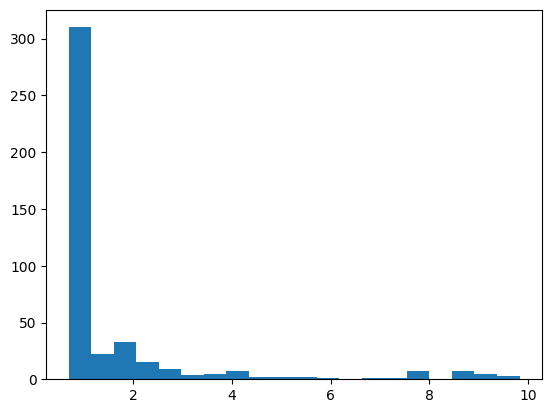

In [ ]:
plt.hist(np.log(partition.sizes()),bins=20)


In [ ]:
%%bigquery df --project=insyspo

  SELECT cluster, COUNT(*) AS size
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters
  GROUP BY cluster
  HAVING size > 50

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: xlabel='cluster'>

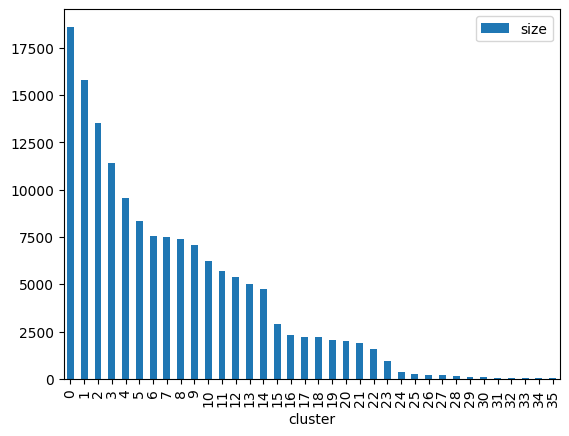

In [ ]:
df.plot.bar(x='cluster',y='size')

In [ ]:
clusters_table = pd.DataFrame({'work': G.vs['name'],'cluster': partition.membership})

In [ ]:
clusters_table.to_gbq('userdb_carolina_zabini.ordovician_clusters', project_id='insyspo', if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6260.16it/s]


In [ ]:
%%bigquery df --project=insyspo

WITH largest AS (
  SELECT cluster, COUNT(*) AS size
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters
  GROUP BY cluster
  HAVING size > 50
)
SELECT a.cluster AS cluster,
  AVG(c.publication_year) AS avg_year,
  MIN(c.publication_year) AS min_year,
  MAX(c.publication_year) AS max_year,
  COUNT(*) AS works,
  STRING_AGG(c.display_name) AS titles,
FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
ON a.work = c.id
JOIN largest AS d
ON d.cluster = a.cluster
WHERE c.cited_by_count>=100
GROUP BY a.cluster
ORDER BY a.cluster


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df.loc[2,'titles']

'Species level patterns in <sup>13</sup>C and <sup>15</sup>N abundance of ectomycorrhizal and saprotrophic fungal sporocarps,The reference intensity ratio,<i>I</i>/<i>I</i><sub><i>c</i></sub>, for computer simulated powder patterns,Fractal characteristics of nano-pores in the Lower Silurian Longmaxi shales from the Upper Yangtze Platform, south China,Geochemical facies analysis of fine-grained siliciclastics using Th/U, Zr/Rb and (Zr+Rb)/Sr ratios,HYDROGEN ISOTOPIC (D/H) COMPOSITION OF ORGANIC MATTER DURING DIAGENESIS AND THERMAL MATURATION,Berechnung der Fließgrenze von Mischkristallen auf Grund der Plastizitätsbedingung für Einkristalle .,From petroleum-type organofacies to hydrocarbon phase prediction,A sequence of events across the Cretaceous-Tertiary boundary,Characterization of porous materials: past, present and future,Studying individual macerals using i.r. microspectrometry, and implications on oil versus gas/condensate proneness and “low-rank” generation,THE ADSORPTION OF GAS

<Axes: xlabel='cluster'>

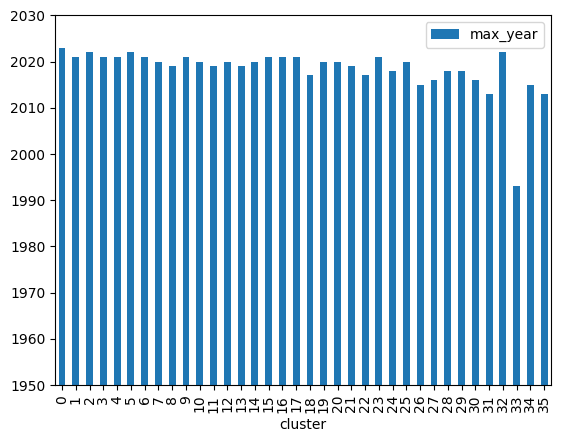

In [ ]:
df[['cluster','max_year']].plot.bar(x = 'cluster',ylim=(1950,2030))

<Axes: xlabel='cluster'>

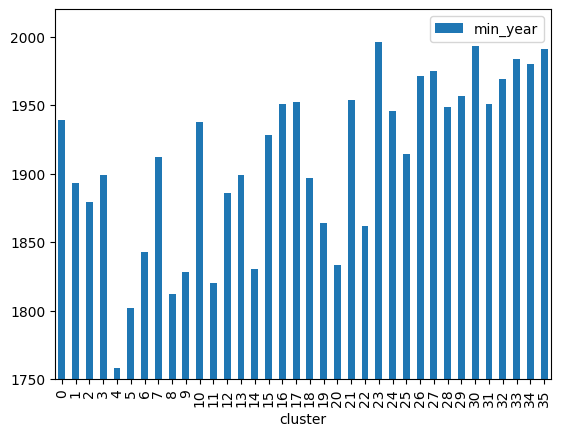

In [ ]:
df[['cluster','min_year']].plot.bar(x = 'cluster',ylim=(1750,2020))

In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_most_relevant_each_cluster;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_most_relevant_each_cluster AS (
  SELECT cluster,
    title,
    work,
    cited_by_count
  FROM (
    SELECT a.cluster AS cluster,
      c.display_name AS title,
      c.cited_by_count,
      a.work,
      ROW_NUMBER() OVER (PARTITION BY a.cluster ORDER BY c.cited_by_count DESC)
        AS cit_order
    FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
    JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
    ON a.work = c.id
    ORDER BY cluster, c.cited_by_count DESC
  )
  WHERE cit_order < 201 AND cluster <15
)

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_cluster_sizes;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_cluster_sizes AS (
  SELECT cluster,
    COUNT(DISTINCT a.work) AS n_works,
    SUM(c.cited_by_count) AS citations,
    AVG(c.publication_year) AS avg_year,
    AVG(cited_by_count) AS avg_citations
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
  ON a.work = c.id
  GROUP BY cluster
)

Query is running:   0%|          |

""


# Topic modelling

In [ ]:
%%bigquery df --project=insyspo

SELECT a.cluster,
  STRING_AGG(a.title,'. ') AS titles,
  SUM(a.cited_by_count) AS relevant_citations,
  AVG(a.cited_by_count) AS relevant_avg_citations,
  b.n_works,
  b.citations,
  b.avg_citations
FROM  insyspo.userdb_carolina_zabini.ordovician_most_relevant_each_cluster AS a
JOIN insyspo.userdb_carolina_zabini.ordovician_cluster_sizes AS b
ON a.cluster = b.cluster
GROUP BY a.cluster, b.n_works, b.citations, b.avg_citations
ORDER BY a.cluster

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df

,cluster,titles,relevant_citations,relevant_avg_citations,n_works,citations,avg_citations
0,0,Partial Melt Distributions from Inversion of R...,420074,2100.370,18585,1855061,99.814958
1,1,Precision Measurement of Half-Lives and Specif...,202006,1010.030,15765,866128,54.939930
2,2,GLC2000: a new approach to global land cover m...,769822,3849.110,13517,1681508,124.399497
3,3,Progress in supervised neural networks. Thermo...,365634,1828.170,11411,891350,78.113224
4,4,ORIGINAL ARTICLE: Predicting species distribut...,693712,3468.560,9527,1250404,131.248452
5,5,REPRODUCTIVE and LARVAL ECOLOGY OF MARINE BOTT...,675950,3379.750,8303,930070,112.016139
6,6,Reef Corals: Mutualistic Symbioses Adapted to ...,319351,1596.755,7517,564030,75.033923
7,7,Abundances of the elements: Meteoritic and sol...,178335,891.675,7487,508588,67.929478
8,8,Nonmetric multidimensional scaling: A numerica...,387005,1935.025,7375,635722,86.199593
9,9,The<b>pls</b>Package: Principal Component and ...,284646,1423.230,7030,562587,80.026600


In [ ]:
!pip install bertopic

In [ ]:
from bertopic import BERTopic
from umap import UMAP
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.decomposition import TruncatedSVD
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=50,
                  n_components=20,
                  min_dist=0.02,
                  metric='euclidean',
                  random_state=100)

#dim_model = TruncatedSVD(n_components=20)
#topic_model = BERTopic(umap_model=dim_model, language="english", calculate_probabilities=True)

#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
#topic_model = BERTopic(ctfidf_model=ctfidf_model)

#representation_model = KeyBERTInspired()

# Initiate BERTopic
#topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,min_topic_size=2,nr_topics='auto')
topic_model = BERTopic(umap_model=umap_model)

In [ ]:
df['titles']

0     Partial Melt Distributions from Inversion of R...
1     Precision Measurement of Half-Lives and Specif...
2     GLC2000: a new approach to global land cover m...
3     Progress in supervised neural networks. Thermo...
4     ORIGINAL ARTICLE: Predicting species distribut...
5     REPRODUCTIVE and LARVAL ECOLOGY OF MARINE BOTT...
6     Reef Corals: Mutualistic Symbioses Adapted to ...
7     Abundances of the elements: Meteoritic and sol...
8     Nonmetric multidimensional scaling: A numerica...
9     The<b>pls</b>Package: Principal Component and ...
10    Melting Relations of Basalt with Equilibrium W...
11    Plants as river system engineers. ISOTOPIC REC...
12    The war of the whorls: genetic interactions co...
13    An Introduction to the Rock-Forming Minerals. ...
14    Yield of sediment in relation to mean annual p...
Name: titles, dtype: object

In [ ]:
topics, probabilities = topic_model.fit_transform(list(df['titles']))
topics_names = topic_model.get_topic_info()

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [ ]:
topics_names.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,15,-1_of_and_the_in,"[of, and, the, in, for, to, on, from, evolutio...",[An Introduction to the Rock-Forming Minerals....


In [ ]:
topic_model.visualize_barchart(top_n_topics=20)

In [ ]:
plt.figure(figsize=(16,12))
topic_model.visualize_hierarchy(top_n_topics=20)

<Figure size 1600x1200 with 0 Axes>

# Production

In [ ]:
%%bigquery  --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_yearly_output;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_yearly_output AS (
  SELECT c.publication_year, COUNT(a.work) AS works
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
  ON a.work = c.id
  GROUP BY c.publication_year
  ORDER BY c.publication_year
)

Query is running:   0%|          |

""


In [ ]:
%%bigquery  --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_yearly;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_yearly AS (
  WITH largest AS (
    SELECT cluster, COUNT(*) AS size
    FROM insyspo.userdb_carolina_zabini.ordovician_clusters
    GROUP BY cluster
    HAVING size > 5000
  )
  SELECT c.publication_year,
    a.cluster,
    COUNT(a.work) AS works
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
  ON a.work = c.id
  JOIN largest AS d
  ON d.cluster = a.cluster
  WHERE publication_year > 1960 AND publication_year < 2020
  GROUP BY a.cluster, c.publication_year
  ORDER BY c.publication_year, a.cluster
)

Query is running:   0%|          |

""


In [ ]:
%%bigquery df --project=insyspo

SELECT *
FROM insyspo.userdb_carolina_zabini.ordovician_clusters_yearly


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
table = pd.pivot_table(df, values='works', index=['publication_year'],
                       columns=['cluster'], aggfunc="sum",fill_value=0)

<Axes: xlabel='publication_year'>

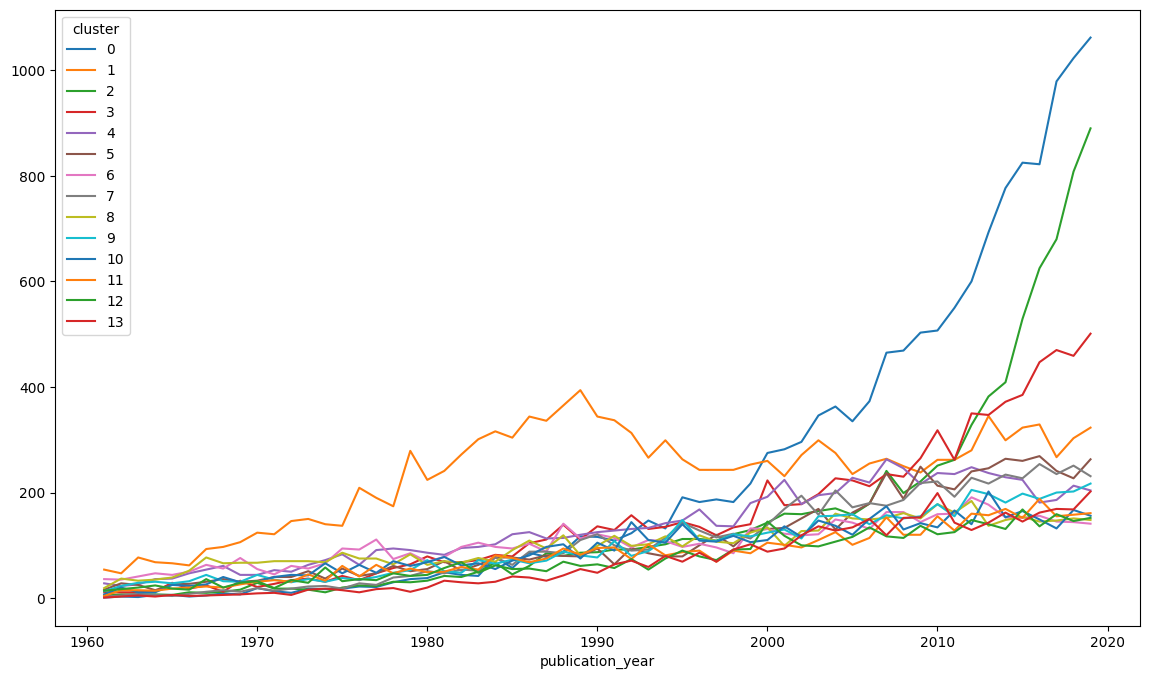

In [ ]:
table.plot.line(figsize=(14,8))

In [ ]:
%%bigquery df --project=insyspo

SELECT a.publication_year, a.cluster, a.works/b.works AS production
FROM insyspo.userdb_carolina_zabini.ordovician_clusters_yearly AS a
JOIN insyspo.userdb_carolina_zabini.ordovician_yearly_output AS b
ON a.publication_year = b.publication_year
WHERE cluster < 6

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
table = pd.pivot_table(df, values='production', index=['publication_year'],
                       columns=['cluster'], aggfunc="sum",fill_value=0)

<Axes: xlabel='publication_year'>

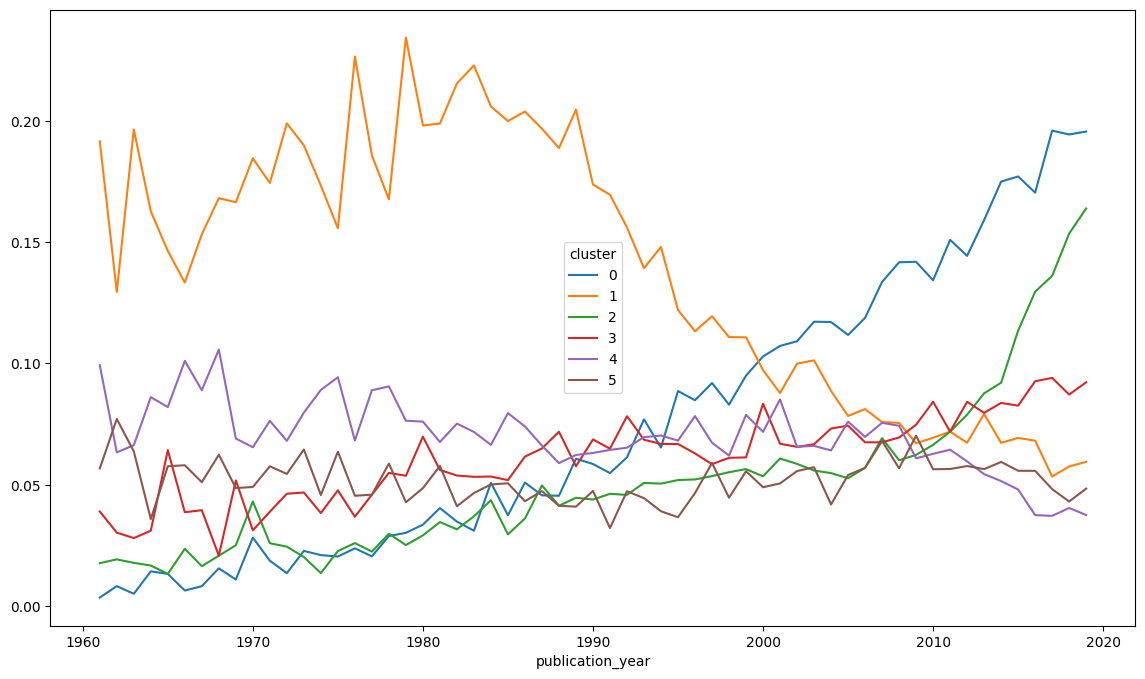

In [ ]:

table.plot.line(figsize=(14,8))

# Network of clusters

In [ ]:
%%bigquery df --project=insyspo

SELECT b.cluster AS cluster1,
  c.cluster AS cluster2,
  COUNT(*) AS n
FROM insyspo.userdb_carolina_zabini.ordovician_citations AS a
JOIN insyspo.userdb_carolina_zabini.ordovician_clusters AS b
ON a.work_id = b.work
JOIN insyspo.userdb_carolina_zabini.ordovician_clusters AS c
ON a.referenced_work_id = c.work
GROUP BY b.cluster, c.cluster
ORDER BY n DESC


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
folder = '/content/drive/My Drive/Colaboração/Paleontology scientometrics/'

Mounted at /content/drive/


In [ ]:
df.head()

,cluster1,cluster2,n
0,0,0,75656
1,2,2,50463
2,1,1,46537
3,9,9,39381
4,4,4,37058


In [ ]:
df.to_csv(folder+'network_clusters.csv',header=None,index=False)

## Labels for clusters

### Most frequent institution

In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_institutions;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_institutions AS (
  SELECT a.cluster, b.institution_id,
    COUNT(DISTINCT(a.work)) AS n
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN insyspo.publicdb_openalex_2024_02_rm.works_authorships AS b
  ON a.work = b.work_id
  GROUP BY a.cluster, b.institution_id
  ORDER BY a.cluster, n DESC
);

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m AS (
  WITH common_insts AS (
    SELECT cluster, MAX(n) AS nmax
    FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institutions
    GROUP BY cluster
    ORDER BY nmax DESC
  )
  SELECT a.cluster, a.institution_id, b.nmax AS works_inst
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institutions AS a
  JOIN common_insts AS b
  ON a.cluster = b.cluster AND a.n = b.nmax
)


Query is running:   0%|          |

""


In [ ]:
%%bigquery df --project=insyspo

SELECT a.cluster,
  ANY_VALUE(b.display_name) AS institution,
  ANY_VALUE(b.country_code) AS country,
  ANY_VALUE(a.works_inst) AS works_largest_inst
FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m AS a
JOIN insyspo.publicdb_openalex_2024_02_rm.institutions AS b
ON a.institution_id = b.id
GROUP BY a.cluster

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df.columns = ['id','description','label','score<works_inst>','weight<works_inst>']
df.to_csv(folder+'clusters_labels.csv',index=False)

### Most frequent venue

In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_institutions;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_institutions AS (
  SELECT a.cluster, b.institution_id,
    COUNT(DISTINCT(a.work)) AS n
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN insyspo.publicdb_openalex_2024_02_rm.works_authorships AS b
  ON a.work = b.work_id
  GROUP BY a.cluster, b.institution_id
  ORDER BY a.cluster, n DESC
);

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m AS (
  WITH common_insts AS (
    SELECT cluster, MAX(n) AS nmax
    FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institutions
    GROUP BY cluster
    ORDER BY nmax DESC
  )
  SELECT a.cluster, a.institution_id
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institutions AS a
  JOIN common_insts AS b
  ON a.cluster = b.cluster AND a.n = b.nmax
)